#### Import Library

In [1]:
import math
import numpy as np 
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

from operator import itemgetter

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests


from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

#### Load Data

In [3]:
df = pd.read_csv('../data/BrentOilPrices.csv')
df.Date = pd.to_datetime(df.Date)
df.head()


C:\Users\getac\AppData\Local\Temp\ipykernel_2528\2315330418.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df.Date)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


#### EDA

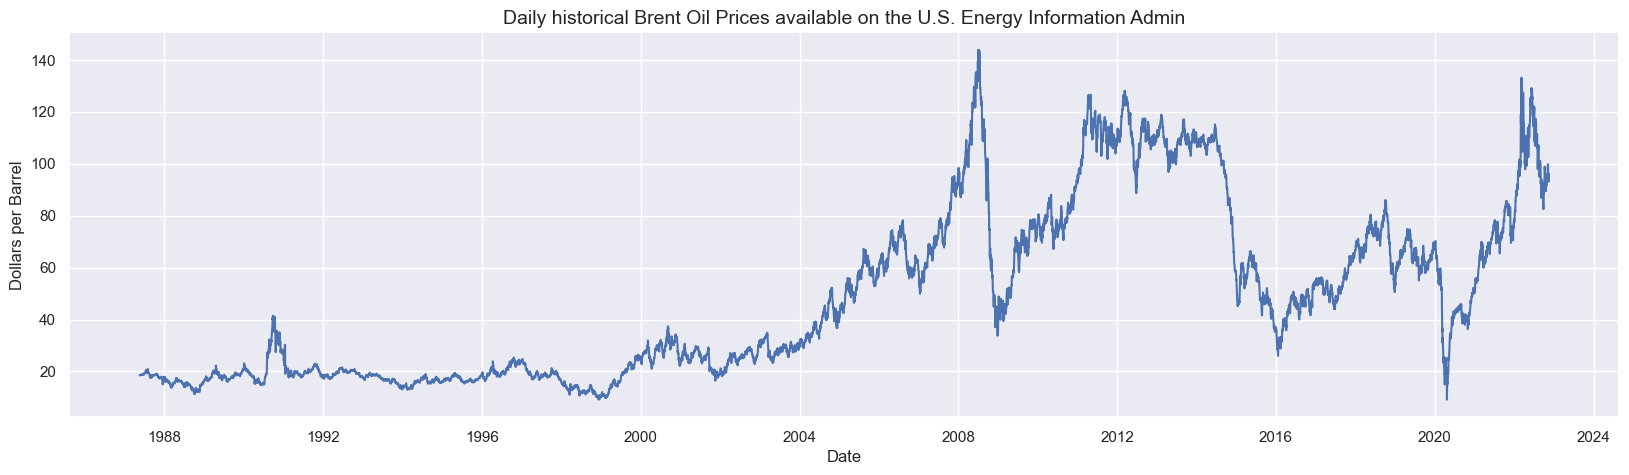

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns # using seaborn because the charts are more visually pleasing

sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Date", y="Price", data=df)
plt.title('Daily historical Brent Oil Prices available on the U.S. Energy Information Admin', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.show()

In [5]:
df.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


In [6]:
scalerz = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scalerz.fit_transform(df.Price.values.reshape(-1, 1))

In [7]:
dataset[0:10]

array([[0.07067112],
       [0.0693363 ],
       [0.07007786],
       [0.07044865],
       [0.07067112],
       [0.07044865],
       [0.07044865],
       [0.07030033],
       [0.07081943],
       [0.0710419 ]])

### Train Test Split

In [8]:
# split into train and test sets

splitz =0.7
train_size = int(len(dataset) * splitz)
test_size = int(len(dataset) * (1-splitz))
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
f'Dataset size: {len(df)} >> Train length: {len(train)} || Test Length: {len(test)}'

'Dataset size: 9011 >> Train length: 6307 || Test Length: 2704'

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
x_train, y_train = create_dataset(train, look_back=15)
x_test, y_test = create_dataset(test, look_back=15)
f'X_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (6291, 15) || y_train: (6291,) || X_test: (2688, 15) || y_test: (2688,)'

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
f'X_train: {x_train.shape} || \
y_train: {y_train.shape} || \
X_test: {x_test.shape} || \
y_test: {y_test.shape}'

'X_train: (6291, 1, 15) || y_train: (6291,) || X_test: (2688, 1, 15) || y_test: (2688,)'

### LSTM Model Traning

In [12]:
# create and fit the LSTM network
look_back = 15
model = Sequential()
model.add(LSTM(20, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Simple early stopping
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('best_model.h5', 
# monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=2)


C:\Users\getac\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
6291/6291 - 8s - 1ms/step - loss: 7.0650e-04
Epoch 2/20
6291/6291 - 7s - 1ms/step - loss: 2.2494e-04
Epoch 3/20
6291/6291 - 7s - 1ms/step - loss: 1.7754e-04
Epoch 4/20
6291/6291 - 6s - 933us/step - loss: 1.6669e-04
Epoch 5/20
6291/6291 - 6s - 908us/step - loss: 1.5386e-04
Epoch 6/20
6291/6291 - 5s - 864us/step - loss: 1.4003e-04
Epoch 7/20
6291/6291 - 6s - 989us/step - loss: 1.5456e-04
Epoch 8/20
6291/6291 - 6s - 1ms/step - loss: 1.4015e-04
Epoch 9/20
6291/6291 - 6s - 1ms/step - loss: 1.2394e-04
Epoch 10/20
6291/6291 - 6s - 995us/step - loss: 1.2307e-04
Epoch 11/20
6291/6291 - 6s - 1ms/step - loss: 1.2292e-04
Epoch 12/20
6291/6291 - 6s - 1ms/step - loss: 1.1775e-04
Epoch 13/20
6291/6291 - 6s - 940us/step - loss: 1.2397e-04
Epoch 14/20
6291/6291 - 6s - 974us/step - loss: 1.1381e-04
Epoch 15/20
6291/6291 - 6s - 932us/step - loss: 1.1923e-04
Epoch 16/20
6291/6291 - 5s - 861us/step - loss: 1.1690e-04
Epoch 17/20
6291/6291 - 5s - 843us/step - loss: 1.0951e-04
Epoch 18/20
6291/629

In [13]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

# invert predictions
trainPredict = scalerz.inverse_transform(trainPredict)
trainY = scalerz.inverse_transform([y_train])
testPredict = scalerz.inverse_transform(testPredict)
testY = scalerz.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step
Train Score: 1.09 RMSE
Test Score: 1.68 RMSE


In [19]:
# r2 scorez
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report


In [20]:
# Calculate additional metrics
train_mae = mean_absolute_error(trainY[0], trainPredict[:, 0])
test_mae = mean_absolute_error(testY[0], testPredict[:, 0])

train_mse = mean_squared_error(trainY[0], trainPredict[:, 0])
test_mse = mean_squared_error(testY[0], testPredict[:, 0])

train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

train_mape = np.mean(np.abs((trainY[0] - trainPredict[:, 0]) / trainY[0])) * 100
test_mape = np.mean(np.abs((testY[0] - testPredict[:, 0]) / testY[0])) * 100

# Print the results
print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')

print(f'Train MSE: {train_mse:.2f}')
print(f'Test MSE: {test_mse:.2f}')

print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')

print(f'Train MAPE: {train_mape:.2f}%')
print(f'Test MAPE: {test_mape:.2f}%')

# R2 Score for test data (already provided but repeated here for clarity)
test_r2 = r2_score(testY[0], testPredict[:, 0])
print(f'Test R2 Score: {test_r2:.4f}')

Train MAE: 0.67
Test MAE: 1.17
Train MSE: 1.19
Test MSE: 2.83
Train RMSE: 1.09
Test RMSE: 1.68
Train MAPE: 1.85%
Test MAPE: 1.81%
Test R2 Score: 0.9958


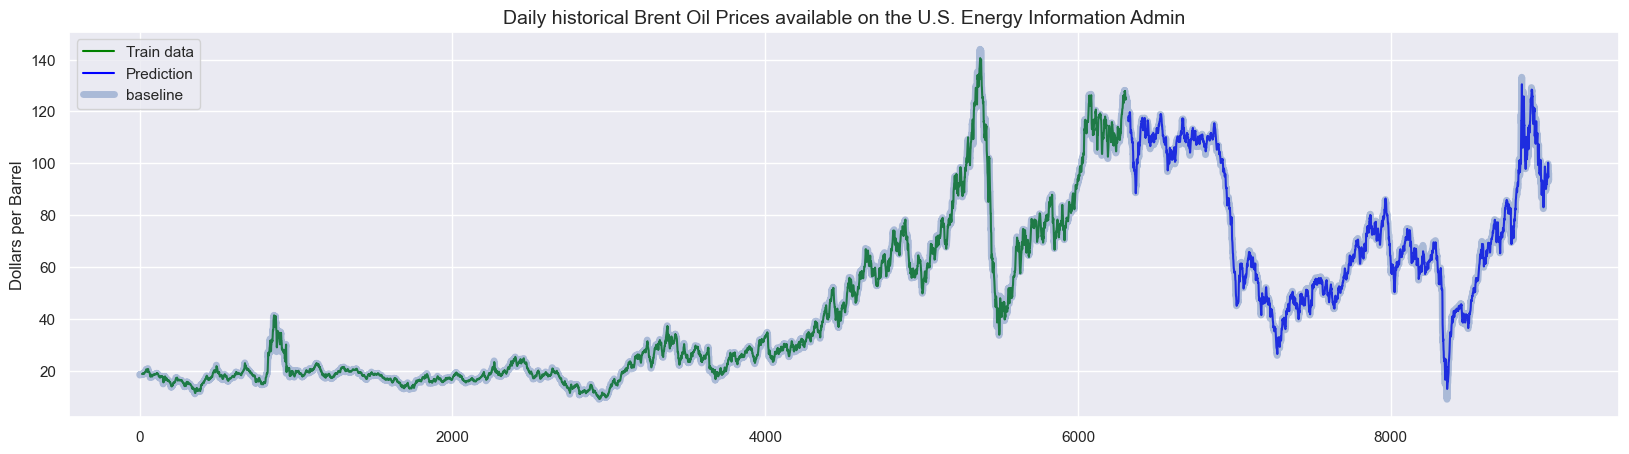

In [21]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(20,5))
plt.plot(trainPredictPlot, color='green', label='Train data')
plt.plot(testPredictPlot, color='blue', label='Prediction',)
plt.plot(scalerz.inverse_transform(dataset),label='baseline', alpha=0.4, linewidth=5)
plt.title('Daily historical Brent Oil Prices available on the U.S. Energy Information Admin', fontsize=14)
plt.ylabel('Dollars per Barrel')
plt.legend()
plt.show()